<a href="https://colab.research.google.com/github/HanzlaJavaid/Brain-Computing-Interface/blob/main/BCI_Mindwave_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/tutorial_tea.csv")
df = df.iloc[:,1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,16012.0,5158.167625,1358.138283,1676.412424,1882.066858,2202.467613,1272.160783,734.850870,331.862516,198.052753,696.073028,970.093078,306.973953,9.149336,658.141069,109.337983,42.571836,112.579166,120.086463,345.767644,155.397555,282.516594,110.389618,107.748964,11.886390,158.200073,103.671374,7.727774,30.947365,160.207936,211.593657,151.647532,100.655710,424.054657,140.825146,225.448242,396.298305,68.176665,146.435005,46.630932,28.135560,206.549732,73.308985,93.130547,88.954509,52.648380,98.530211,16.061144,245.102231,514.048104,0.0
1,6788.0,2224.451905,4541.447190,3742.328003,2063.413918,1977.750850,1415.344430,645.290676,117.917392,132.659579,288.107151,548.699066,147.012275,424.110076,131.403754,296.043991,124.748233,376.682546,20.473376,597.585640,72.442188,292.887935,78.331788,302.756701,57.665251,99.742646,517.997283,669.982130,300.245178,362.974566,116.914360,384.104897,161.858512,235.864994,7.459938,213.174930,134.900182,2.409028,42.517165,137.881555,116.679846,236.657087,451.809030,303.561664,39.015914,146.416672,55.955417,172.647081,40.618273,108.145779,0.0
2,9272.0,120.115136,2363.854224,59.369315,1315.529029,481.141249,1411.538070,274.888370,64.773787,609.562067,548.454255,1091.531149,71.772839,265.238218,584.069878,381.195172,319.767010,282.657895,237.870968,126.045130,713.668697,42.735356,240.455569,536.362139,101.525651,146.668144,309.377956,428.687655,471.546141,240.828871,732.817304,286.535538,131.249907,365.661257,311.256377,157.682823,9.296058,388.713405,225.082281,42.304804,91.144718,144.744280,262.298233,145.569071,513.914325,189.985134,255.929089,115.516443,46.674171,34.515031,1.0
3,11937.0,1462.657881,5498.463048,3166.211035,1456.365380,2389.938419,803.757239,866.116937,282.172349,74.710203,671.572094,1104.417439,277.970037,396.101015,185.671292,941.189839,64.584257,238.798902,624.277252,293.310954,97.771741,529.684838,251.157826,49.538034,362.909701,230.814042,49.176785,69.023859,94.219369,388.084379,61.093848,143.103710,10.792987,268.004441,143.006227,135.032046,200.224245,282.594661,473.683973,365.700368,191.143295,312.366200,151.371060,1.849036,272.119940,38.774247,217.341544,146.652036,309.220736,10.248949,0.0
4,12308.0,3747.589838,3152.813817,687.188643,813.248289,1930.596436,264.622849,770.099468,1040.324188,202.110647,181.775718,142.891296,265.910529,494.296358,57.021185,6.369315,415.754597,49.874050,22.126537,73.930462,61.762386,384.210047,208.315633,262.944028,149.715756,65.850037,57.013127,142.613148,207.050604,46.952873,49.914004,73.566321,133.988306,143.271643,112.074746,18.510864,181.592092,98.095307,471.731885,209.992420,245.101545,288.261371,229.557392,190.675105,56.272391,179.091377,39.061506,223.933504,106.239786,172.667684,0.0


In [6]:
df['50'].value_counts()

0.0    1225
1.0    1219
Name: 50, dtype: int64

In [7]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [8]:
St = StandardScaler()
St.fit(X)
X = St.transform(X)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1955, 50)
(1955,)
(489, 50)
(489,)


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256,input_shape=(50,),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               13056     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [12]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
62/62 [==============================] - 2s 10ms/step - loss: 0.6233 - accuracy: 0.6762 - val_loss: 0.5981 - val_accuracy: 0.7546
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 0.7468 - val_loss: 0.5431 - val_accuracy: 0.7730
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7652 - val_loss: 0.5297 - val_accuracy: 0.7751
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7893 - val_loss: 0.5085 - val_accuracy: 0.7791
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.7918 - val_loss: 0.5224 - val_accuracy: 0.7853
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8077 - val_loss: 0.4918 - val_accuracy: 0.7648
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8153 - val_loss: 0.5018 - val_accuracy: 0.7751
Epoch 8/50
62/62 [=

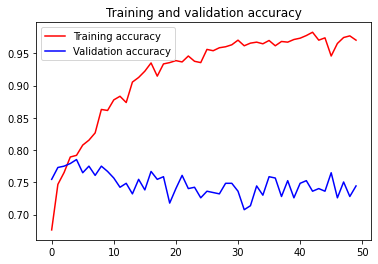

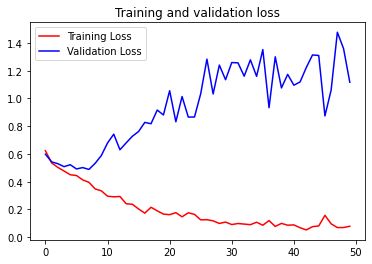

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
df_t = pd.read_csv("/content/drive/MyDrive/TEST_STUDY.csv")
df_t = df_t.iloc[:,1:]
df_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,8968.0,1207.801586,1144.372342,1167.696396,484.791658,996.573137,169.372779,538.081093,875.782194,1437.664256,633.114039,1081.997885,1325.986383,624.119698,584.768840,985.868992,696.445757,256.130008,35.538209,130.839060,305.372783,197.570986,429.288183,432.438786,243.236401,656.552029,91.243562,53.132357,62.894885,162.278128,419.825361,144.638459,3.659605,60.560345,241.752692,220.697300,360.469444,450.554658,314.350905,80.324658,257.458923,18.971722,577.436166,255.602694,210.285614,559.120091,11.620255,479.786596,534.699027,146.783978,0.0
1,1265.0,5115.239108,9076.057154,1253.971902,7504.754727,255.974364,2366.869754,1536.018051,1657.920606,1234.247103,306.324244,70.497756,14.380554,620.340114,84.442817,120.148724,141.306402,165.430119,839.125953,417.458288,201.000191,117.306720,365.912045,238.337020,213.125102,465.815002,16.322970,143.266430,145.273956,275.915392,69.199740,478.100521,631.710257,247.224565,1059.081842,38.273415,481.354455,117.952091,55.734286,206.875578,310.347777,160.116815,124.707477,149.704785,308.148952,238.712667,22.406603,248.432822,104.648568,76.705248,0.0
2,2142.0,22397.623280,22404.365524,7434.827897,5542.395020,890.982780,1673.368410,944.410582,1120.780031,585.871299,613.921615,1094.758718,81.787310,204.813750,380.823353,69.220341,142.820645,249.608361,0.471641,305.791824,96.279323,280.034775,276.901751,279.644262,273.003621,180.573909,117.097447,211.712934,169.576472,87.277049,253.755579,134.216779,10.169852,233.416208,181.290095,237.977567,897.499489,335.250073,46.952932,71.978998,17.606133,40.417956,16.027326,126.738032,53.577273,91.038732,305.847764,198.372634,253.796776,416.384827,0.0
3,17818.0,1513.459077,314.971243,1589.402312,56.591281,32.680222,333.697609,437.408178,590.974214,330.217497,1261.217507,461.445058,1317.586484,243.059812,126.685042,89.742820,159.395779,308.595234,85.361145,307.214017,162.024169,340.915282,257.207027,230.042113,41.307146,211.910790,476.008232,167.706238,48.133863,236.815677,102.039812,37.445307,68.490296,62.763694,7.844947,491.300194,130.054193,32.499900,483.526586,124.769486,164.492115,199.283928,196.257390,81.079489,39.513172,202.147789,234.336833,35.479670,21.447272,211.195716,0.0
4,10758.0,3791.081595,2654.771859,1012.308239,778.173882,664.358878,174.948400,280.174874,820.977122,818.033219,53.236207,217.220310,265.849447,467.726089,102.290721,137.139090,119.973497,477.415080,460.628694,78.508006,639.489826,218.152687,239.914177,146.397493,50.654724,31.343459,333.272866,534.706202,73.573066,396.175457,335.001854,352.037625,186.170542,279.411589,431.872984,544.741790,469.794287,643.100657,725.645328,635.313793,340.865362,25.434210,405.978408,118.860179,216.401121,429.550937,222.115829,93.532373,455.160643,364.997864,0.0


In [16]:
X_test = df_t.values[:,:-1]

In [17]:
x_test = St.transform(X_test)

In [18]:
y_test = df_t.values[:,-1]

In [19]:
model.evaluate(x_test,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.8164


[0.6804034113883972, 0.8163742423057556]